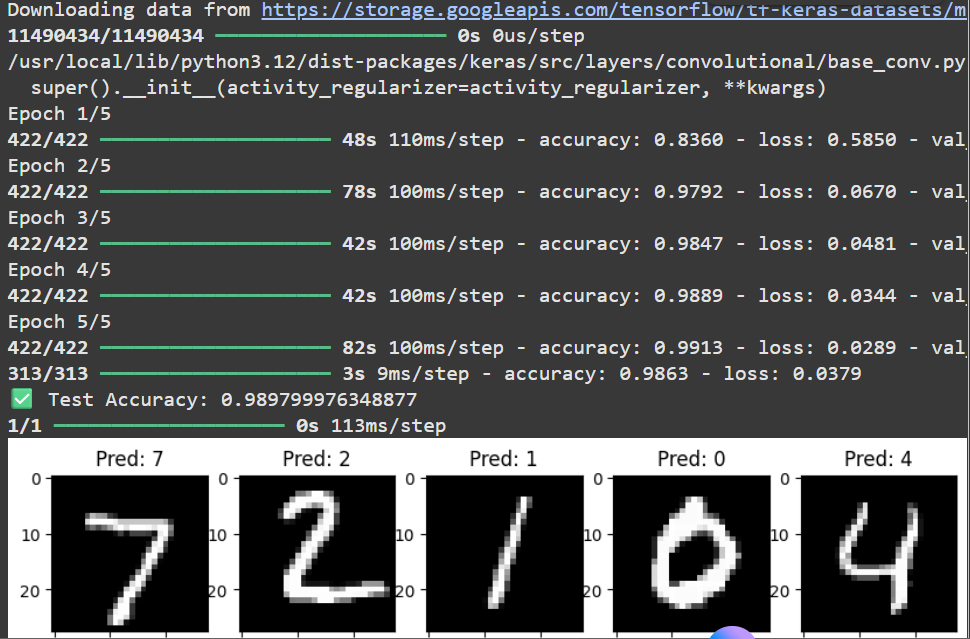
This code trains a convolutional neural network (CNN) on the MNIST dataset to classify handwritten digits. It loads and preprocesses the data, builds a CNN model, compiles and trains it, evaluates its performance, and visualizes some predictions.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 48s 110ms/step - accuracy: 0.8360 - loss: 0.5850 - val_accuracy: 0.9810 - val_loss: 0.0682
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.9792 - loss: 0.0670 - val_accuracy: 0.9873 - val_loss: 0.0475
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.9847 - loss: 0.0481 - val_accuracy: 0.9852 - val_loss: 0.0478
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.9889 - loss: 0.0344 - val_accuracy: 0.9890 - val_loss: 0.0390
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.9913 - loss: 0.0289 - val_accuracy: 0.9880 - val_loss: 0.0408
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9863 - loss: 0.0379
✅ Test Accuracy: 0.989799976348877
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


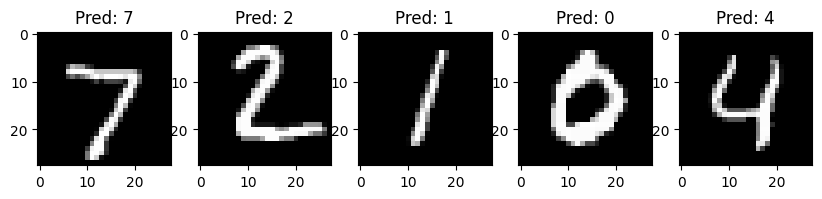

In [1]:
# 🧠 Task 2: CNN for MNIST Handwritten Digit Classification

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2️⃣ Preprocess
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 3️⃣ Build CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 4️⃣ Compile & Train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

# 5️⃣ Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print("✅ Test Accuracy:", test_acc)

# 6️⃣ Visualize predictions
preds = np.argmax(model.predict(x_test[:5]), axis=1)
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {preds[i]}")
plt.show()
